# Problem Statement:


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. </font>



# Bussiness Goal

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# import important library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,r2_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

# visualization of data

In [2]:
data=pd.read_csv('insurance_train_data.csv')
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


from data it is clear that response has two class 0 and 1 hence binary classification problem and also GENDER ,VEHICAL_DAMAGE,VEHICAL_AGE are 3 categorical features and rest features are numerical in nature 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


now see some information about data it is clearly seen that 381109 rows and no missing value as count is equal to number of row and 12 columns and its corresponding data type

# Exploratory data analysis

In [4]:
data.drop(['id'],inplace=True,axis=1)
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


statistical description of features which containing only numerical value, information we gain from here is like mean ,median,mode, min ,max,quartile value, and Skewness while observing mean and median value so main features like age which looks like normally distributed as mean and median is nearly equal same as annual primium 

In [5]:
data.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


statistical analysis of categorical features its unique value in each feature represent the unique category in feature like gender has two unique MALE and FEMALE vehicle_age has three category and vehicle_damage has two category top represent maximum frequency among unique category we can say kind of mode of corresponding features

In [6]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

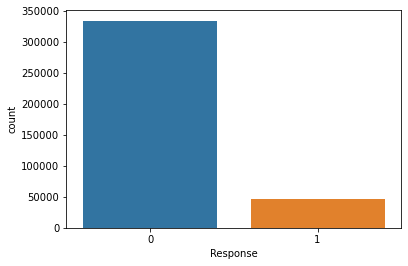

In [7]:
sns.countplot(data.Response)

Response is Class label as from above it is unbalance data as class label count is unbalance binary classification

# Univariate Analysis

# categorical features

# 1.Gender

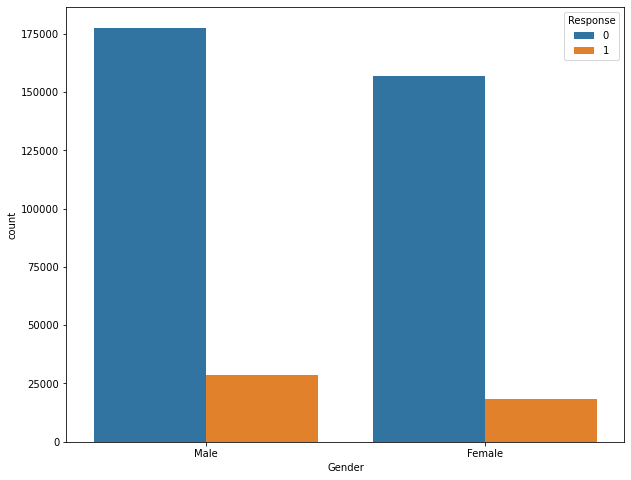

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(data.Gender,hue=data.Response)
plt.show()

in above countplot in both category 0 response is very large count as compare 1 hence again from above plot data is unbalance 

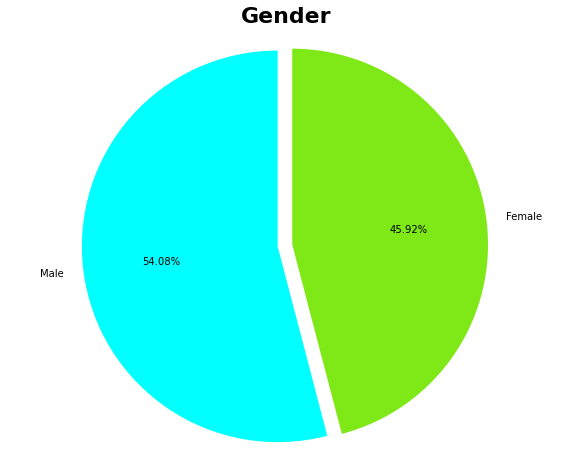

In [9]:
plt.figure(figsize=(10,8))
plt.pie(data.Gender.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',colors=['#00FFFF','#7FE817'],radius=4,labels=['Male','Female'])
plt.title('Gender',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

In [10]:
data.Gender=pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes
correlation1=data.corr()

In [11]:
correlation1[['Gender']].sort_values(by='Gender',ascending=False).style.background_gradient(cmap='cool_r')

,Gender
Gender,1.000000
Policy_Sales_Channel,0.111159
Previously_Insured,0.081932
Driving_License,0.018374
Vintage,0.002517
Region_Code,-0.000604
Annual_Premium,-0.003673
Response,-0.052440
Age,-0.145545


here i done factor analysis of Gender attribute to rest of attribute but no significance correlation value is found

# 2. Vehical age

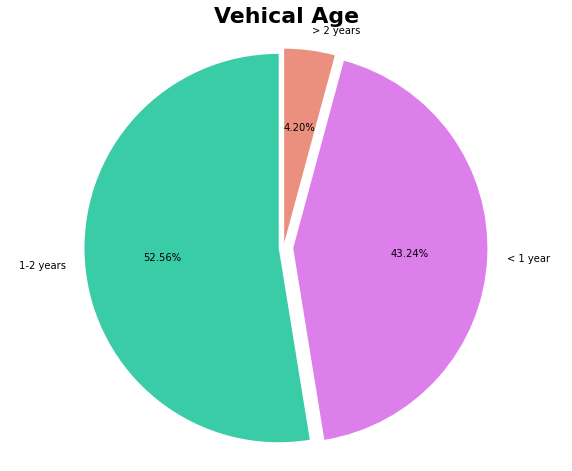

In [12]:
plt.figure(figsize=(10,8))
plt.pie(data.Vehicle_Age.value_counts(),explode=[.1,.2,.1],startangle=90,autopct='%.2f%%',radius=4,colors=['#3ACCA7','#DD7FEB','#EB8F7F'],labels=['1-2 years','< 1 year','> 2 years'])
plt.title('Vehical Age',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

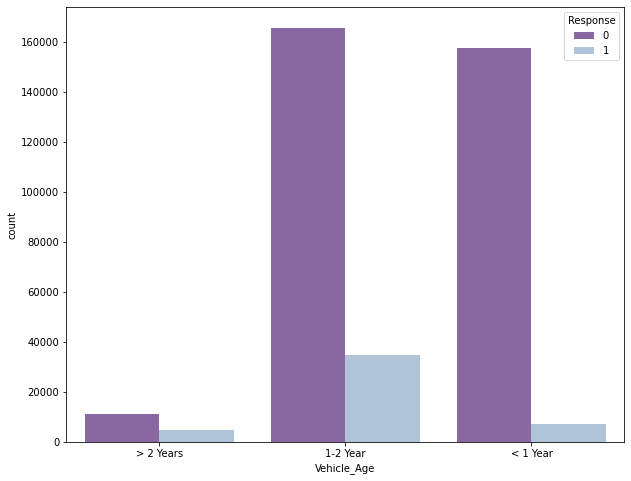

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data.Vehicle_Age,hue=data.Response,palette='BuPu_r')
plt.show()

In [14]:
data.Vehicle_Age=pd.Categorical(data.Vehicle_Age,categories=['1-2 Year','< 1 Year','> 2 Years'],ordered=True).codes
correlation2=data.corr()

In [15]:
correlation2[['Vehicle_Age']].sort_values(['Vehicle_Age'],ascending=False).style.background_gradient(cmap='PiYG')

,Vehicle_Age
Vehicle_Age,1.000000
Policy_Sales_Channel,0.388551
Previously_Insured,0.174783
Gender,0.112625
Driving_License,0.030173
Annual_Premium,0.023656
Vintage,0.002484
Region_Code,-0.027840
Response,-0.104078
Age,-0.522300


in vehicle_age also no significance correlation found with other features 

# 3.Vehicle_Damage

In [16]:
data.Vehicle_Damage.value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

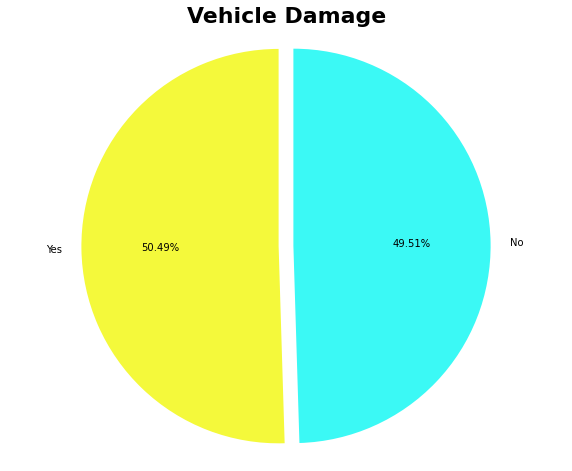

In [17]:
plt.figure(figsize=(10,8))
plt.pie(data.Vehicle_Damage.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',colors=['#F4F93B','#3BF9F5'],radius=4,labels=['Yes','No'])
plt.title('Vehicle Damage',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

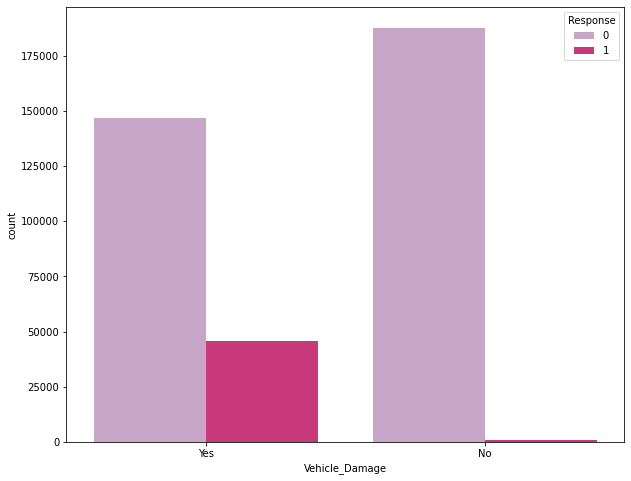

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data.Vehicle_Damage,hue=data.Response,palette='PuRd')
plt.show()

In [19]:
data.Vehicle_Damage=pd.Categorical(data.Vehicle_Damage,categories=['Yes','No'],ordered=True).codes
correlation3=data.corr()

In [20]:
correlation3[['Vehicle_Damage']].sort_values(by='Vehicle_Damage',ascending=False).style.background_gradient(cmap='viridis')

,Vehicle_Damage
Vehicle_Damage,1.000000
Previously_Insured,0.824143
Policy_Sales_Channel,0.224377
Vehicle_Age,0.174238
Gender,0.091606
Driving_License,0.016622
Vintage,0.002064
Annual_Premium,-0.009349
Region_Code,-0.028235
Age,-0.267534


Here it is quite evident that vehicle damage is highly correlated with, the feature that is that was previously insured?

# Numerical features

# 1.Age



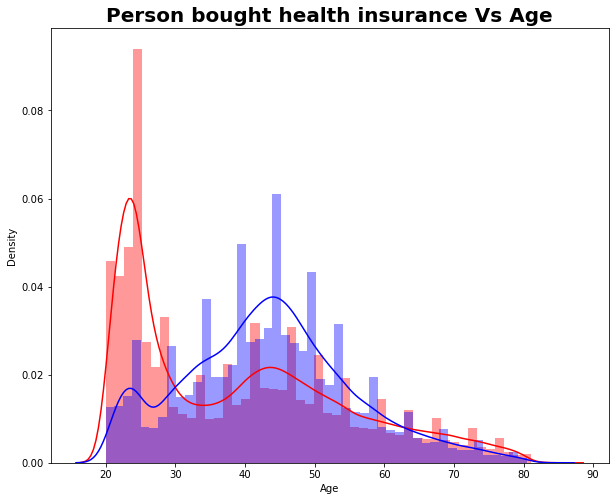

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age,color='red',label='Age')
sns.distplot(data.Age[data.Response==1],color='blue')
plt.title('Person bought health insurance Vs Age',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

Age group of 40-50 have higher chance of buying the health insurance and also age distribution is skewed showing in red color and age corresponding to 1 response value means which is interested in buying insurance showing nearly normal distribution 

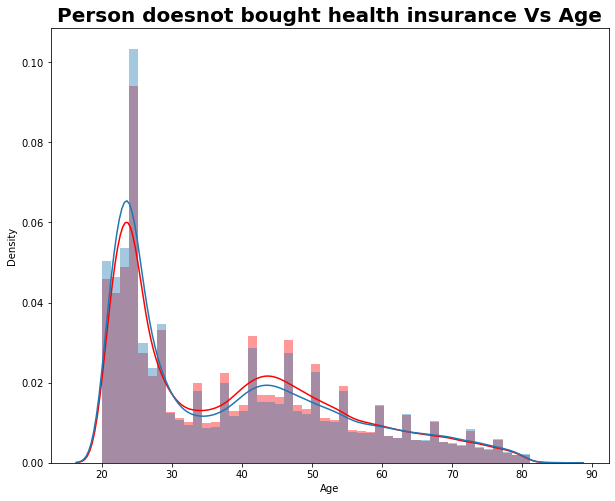

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age,color='red',label='Age')
sns.distplot(data.Age[data.Response==0])
plt.title('Person doesnot bought health insurance Vs Age',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

clealy from above plot data is skewed 

# Scaling Down Age

In [23]:
max_age=max(data.Age)
min_age=min(data.Age)
data.Age=data.Age.apply(lambda x: (x-min_age)/(max_age-min_age))

normalize the age features 

In [24]:
correlation=data.corr()
correlation[['Age']].sort_values(by='Age',ascending=False).style.background_gradient(cmap='Blues_r')

,Age
Age,1.000000
Response,0.111147
Annual_Premium,0.067507
Region_Code,0.042574
Vintage,-0.001264
Driving_License,-0.079782
Gender,-0.145545
Previously_Insured,-0.254682
Vehicle_Damage,-0.267534
Vehicle_Age,-0.522300


from above correlation factor is not much significance only Vehicle_Age and Policy_Sales_Channel showing negative correlation with above 0.5

# 2. Annual premium

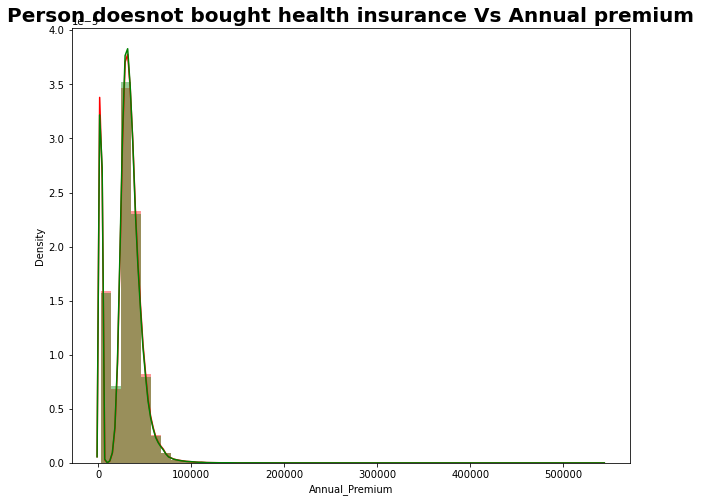

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(data.Annual_Premium,color='red',label='Annual Premium')
sns.distplot(data.Annual_Premium[data.Response==0],color='green')
plt.title('Person doesnot bought health insurance Vs Annual premium',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [26]:
max_premium=max(data.Annual_Premium)
min_premium=min(data.Annual_Premium)
data.Annual_Premium=data.Annual_Premium.apply(lambda x: (x-min_premium)/(max_premium-min_premium))

In [27]:
correlation[['Annual_Premium']].sort_values(by='Annual_Premium',ascending=False).style.background_gradient(cmap='Blues')

,Annual_Premium
Annual_Premium,1.000000
Age,0.067507
Vehicle_Age,0.023656
Response,0.022575
Previously_Insured,0.004269
Vintage,-0.000608
Gender,-0.003673
Vehicle_Damage,-0.009349
Region_Code,-0.010588
Driving_License,-0.011906


# Multivariate Analysis

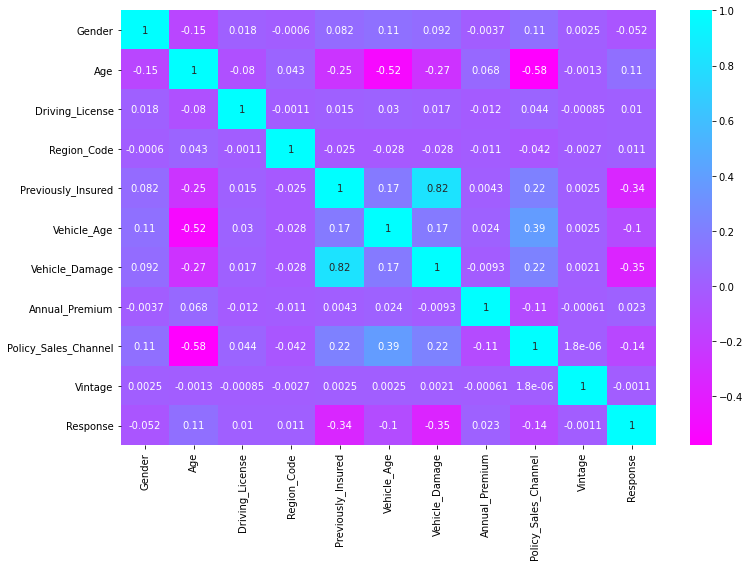

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='cool_r')
plt.show()

in multivariete correlation analysis only showing vehicle_damage with priviously insured having high correlation value which is 0.83

# Resampling to solve the problem of imbalanced data

In [29]:
import imblearn
from collections import Counter

# using diffrent sampling technique to do undersampling and oversampling

In [30]:
# class count
class_count_0, class_count_1 = data['Response'].value_counts()

# Separate class
class_0 = data[data['Response'] == 0]
class_1 = data[data['Response'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (334399, 11)
class 1: (46710, 11)


total class of 1 and0: 1    46710
0    46710
Name: Response, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

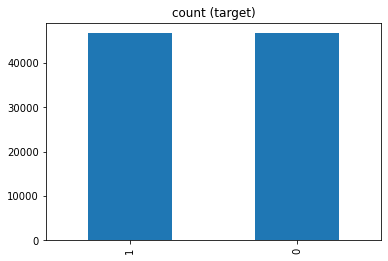

In [31]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Response'].value_counts())# plot the count after under-sampeling
test_under['Response'].value_counts().plot(kind='bar', title='count (target)')


total class of 1 and 0: 1    46710
0    46710
Name: Response, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

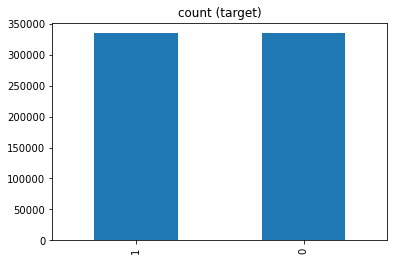

In [32]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['Response'].value_counts())# plot the count after under-sampeling
test_over['Response'].value_counts().plot(kind='bar', title='count (target)')

# using imblearn to do under sampling and over sampling

In [33]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample (data,data.Response)

print('original dataset shape:', Counter(data.Response))
print('Resample dataset shape', Counter(y_rus))


original dataset shape: Counter({0: 334399, 1: 46710})
Resample dataset shape Counter({0: 46710, 1: 46710})


In [34]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(data,data.Response)

print('Original dataset shape', Counter(data.Response))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 334399, 1: 46710})
Resample dataset shape Counter({1: 334399, 0: 334399})


# Using SMOTE to solve the problem of imbalanced data

using smote method and use oversampling to balance inbalance dataset

In [35]:
label_data=data.drop(['Response'],axis=1)


In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(label_data,data.Response)

print('Original dataset shape', Counter(data.Response))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 334399, 1: 46710})
Resample dataset shape Counter({1: 334399, 0: 334399})


In [37]:
oversample=SMOTE()
X,y=oversample.fit_resample(data.iloc[:,:10],data.iloc[:,10])


# Spliting train-test Data

In [38]:
train_x,test_x,train_y,test_y=train_test_split(x_smote,y_smote,test_size=.1,random_state=42)

# Model training And Evaluation¶

in each model trainning and evalution we generate confusion matrix and also generate classification report

# 1.Logistic Regression

In [39]:
classifier1=LogisticRegression(tol=0.01,max_iter=1000)
classifier1.fit(train_x,train_y)

LogisticRegression(max_iter=1000, tol=0.01)

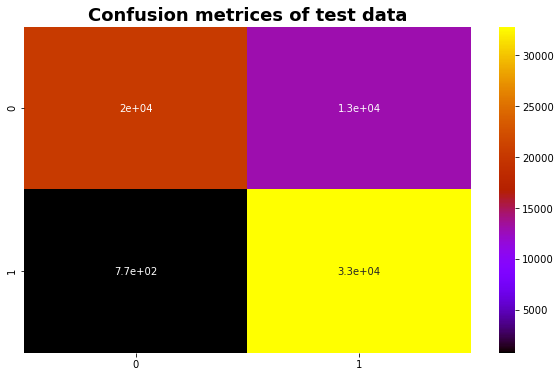

In [40]:
pred_test_y=classifier1.predict(test_x)
pred_train_y=classifier1.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gnuplot')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [41]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.96      0.61      0.75    301112
           1       0.71      0.98      0.82    300806

    accuracy                           0.79    601918
   macro avg       0.84      0.79      0.79    601918
weighted avg       0.84      0.79      0.79    601918



In [42]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.96      0.61      0.75     33287
           1       0.72      0.98      0.83     33593

    accuracy                           0.80     66880
   macro avg       0.84      0.79      0.79     66880
weighted avg       0.84      0.80      0.79     66880



# 2. DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(random_state=42,max_depth=8)
grid1=GridSearchCV(model1,param_grid={'max_depth':range(5,8)})
grid1.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=8, random_state=42),
             param_grid={'max_depth': range(5, 8)})

In [44]:
grid1.best_params_

{'max_depth': 7}

In [47]:
classifier2=DecisionTreeClassifier(random_state=42,max_depth=7)
classifier2.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=7, random_state=42)

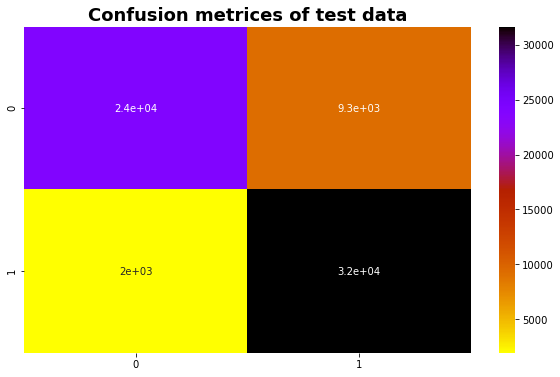

In [48]:
pred_test_y=classifier2.predict(test_x)
pred_train_y=classifier2.predict(train_x)
cm1=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm1,annot=True,cmap='gnuplot_r')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [51]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.92      0.72      0.81    301112
           1       0.77      0.94      0.85    300806

    accuracy                           0.83    601918
   macro avg       0.85      0.83      0.83    601918
weighted avg       0.85      0.83      0.83    601918



In [52]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.92      0.72      0.81     33287
           1       0.77      0.94      0.85     33593

    accuracy                           0.83     66880
   macro avg       0.85      0.83      0.83     66880
weighted avg       0.85      0.83      0.83     66880



# 3. KNN Classifier

In [40]:
classifier3=KNeighborsClassifier(n_neighbors=100)
classifier3.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=100)

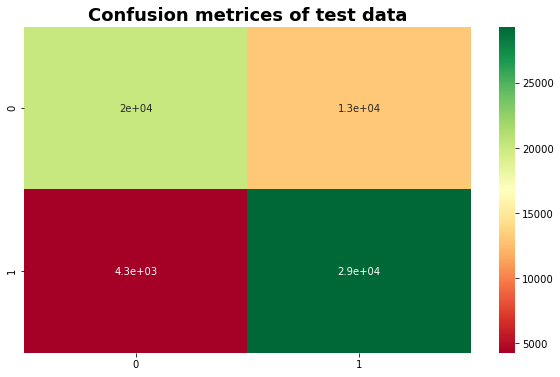

In [41]:
pred_test_y=classifier3.predict(test_x)
pred_train_y=classifier3.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='RdYlGn')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [42]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.83      0.61      0.70    301112
           1       0.69      0.88      0.77    300806

    accuracy                           0.74    601918
   macro avg       0.76      0.74      0.74    601918
weighted avg       0.76      0.74      0.74    601918



In [43]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.82      0.61      0.70     33287
           1       0.69      0.87      0.77     33593

    accuracy                           0.74     66880
   macro avg       0.76      0.74      0.73     66880
weighted avg       0.76      0.74      0.73     66880



# 4.RandomForestClassifier

In [44]:
classifier4=RandomForestClassifier(random_state=42,max_depth=6)
classifier4.fit(train_x,train_y)

RandomForestClassifier(max_depth=6, random_state=42)

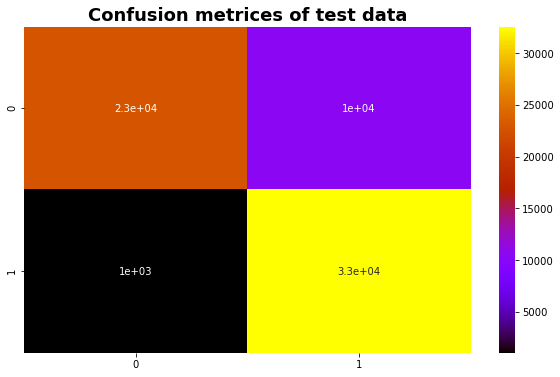

In [45]:
pred_test_y=classifier4.predict(test_x)
pred_train_y=classifier4.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gnuplot')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [46]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.96      0.68      0.80    301112
           1       0.75      0.97      0.85    300806

    accuracy                           0.83    601918
   macro avg       0.85      0.83      0.82    601918
weighted avg       0.85      0.83      0.82    601918



In [47]:
print('Classification report of train data \n',classification_report(test_y,pred_test_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     33287
           1       0.76      0.97      0.85     33593

    accuracy                           0.83     66880
   macro avg       0.86      0.83      0.82     66880
weighted avg       0.86      0.83      0.82     66880



# 5.XGBoostClassifier


In [48]:
classifier5=XGBClassifier()
classifier5.fit(train_x,train_y)

[04:39:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

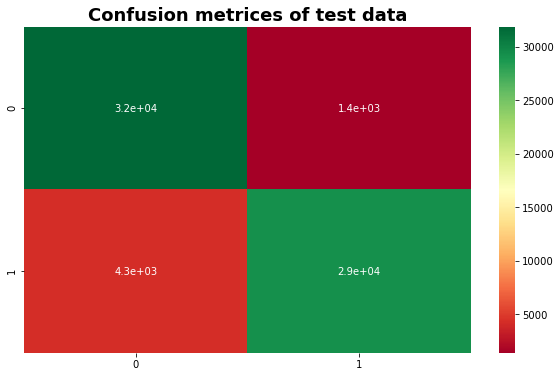

In [49]:
pred_test_y=classifier5.predict(test_x)
pred_train_y=classifier5.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='RdYlGn')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [50]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92    301112
           1       0.95      0.87      0.91    300806

    accuracy                           0.92    601918
   macro avg       0.92      0.92      0.92    601918
weighted avg       0.92      0.92      0.92    601918



In [51]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     33287
           1       0.95      0.87      0.91     33593

    accuracy                           0.91     66880
   macro avg       0.92      0.91      0.91     66880
weighted avg       0.92      0.91      0.91     66880



# 6.GradientBoosting Classifier

In [52]:
classifier6=GradientBoostingClassifier(random_state=42)
classifier6.fit(train_x,train_y)

GradientBoostingClassifier(random_state=42)

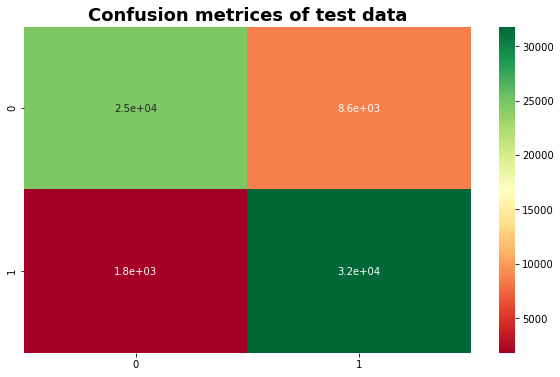

In [53]:
pred_test_y=classifier6.predict(test_x)
pred_train_y=classifier6.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='RdYlGn')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [54]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.93      0.74      0.82    301112
           1       0.78      0.95      0.86    300806

    accuracy                           0.84    601918
   macro avg       0.86      0.84      0.84    601918
weighted avg       0.86      0.84      0.84    601918



In [55]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.93      0.74      0.83     33287
           1       0.79      0.95      0.86     33593

    accuracy                           0.84     66880
   macro avg       0.86      0.84      0.84     66880
weighted avg       0.86      0.84      0.84     66880



# 7. CategoricalNB

In [56]:
classifier7=CategoricalNB()
classifier7.fit(train_x,train_y)

CategoricalNB()

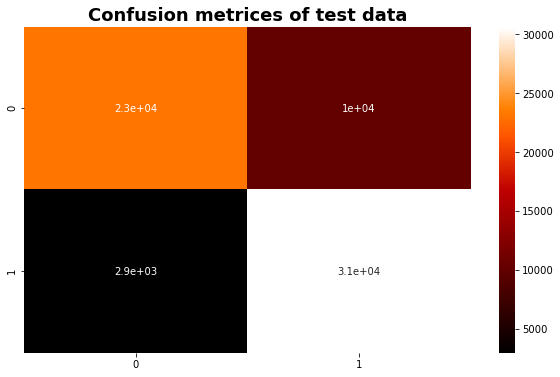

In [57]:
pred_test_y=classifier7.predict(test_x)
pred_train_y=classifier7.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gist_heat')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [58]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.89      0.69      0.78    301112
           1       0.75      0.91      0.82    300806

    accuracy                           0.80    601918
   macro avg       0.82      0.80      0.80    601918
weighted avg       0.82      0.80      0.80    601918



In [59]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.89      0.69      0.78     33287
           1       0.75      0.91      0.82     33593

    accuracy                           0.80     66880
   macro avg       0.82      0.80      0.80     66880
weighted avg       0.82      0.80      0.80     66880



# 8. LinearSVC

In [60]:
classifier8=LinearSVC()
classifier8.fit(train_x,train_y)

LinearSVC()

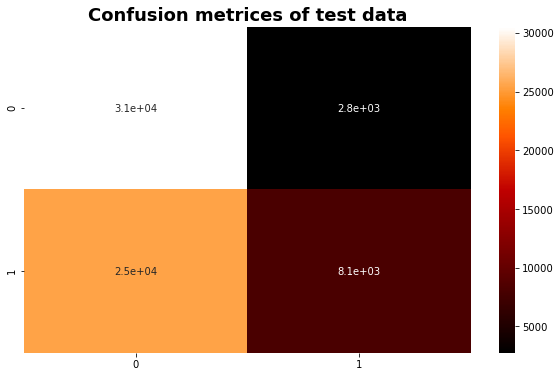

In [61]:
pred_test_y=classifier8.predict(test_x)
pred_train_y=classifier8.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gist_heat')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [62]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.55      0.92      0.69    301112
           1       0.75      0.24      0.37    300806

    accuracy                           0.58    601918
   macro avg       0.65      0.58      0.53    601918
weighted avg       0.65      0.58      0.53    601918



In [63]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.55      0.92      0.68     33287
           1       0.75      0.24      0.37     33593

    accuracy                           0.58     66880
   macro avg       0.65      0.58      0.52     66880
weighted avg       0.65      0.58      0.52     66880



In [ ]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(train_x, train_y)

print_score(model, train_x, train_y, test_x, test_y, train=True)
print_score(model, train_x, train_y, test_x, test_y, train=False)

# Conclusion

From the above analysis it is quite evidient that XGBoostClassifier works better than other algoriths. With test accuracy of about 91%
